In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [82]:
df=pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [83]:
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [84]:
df.shape

(500, 9)

In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [87]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


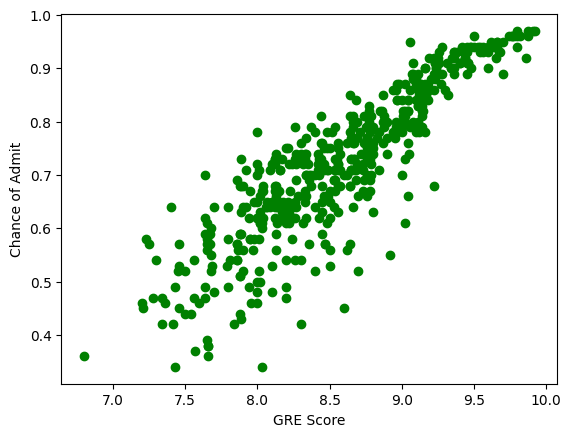

In [88]:
import matplotlib.pyplot as plt

plt.scatter(df['CGPA'], df['Chance of Admit '],color='green')  # use the exact column name
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()

In [89]:
X=df.drop(columns=['Serial No.','Chance of Admit '],axis=1)
y=df['Chance of Admit ']

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [92]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [93]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [96]:
history=model.fit(X_train_sc,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.4949 - val_loss: 0.4580
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4182 - val_loss: 0.4015
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3722 - val_loss: 0.3439
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3090 - val_loss: 0.2812
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2504 - val_loss: 0.2079
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1670 - val_loss: 0.1293
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1072 - val_loss: 0.0706
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0603 - val_loss: 0.0474
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0363 - val_loss: 0.0456
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0390 - val_loss: 0.0443
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0351 - val_loss: 0.0415
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0

In [97]:
y_log=model.predict(X_test_sc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [98]:
from sklearn.metrics import r2_score
r2_score(y_test,y_log)

0.8255923150032778

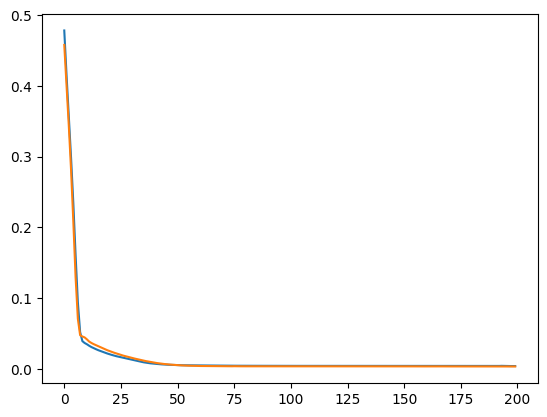

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])